In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import warnings

#Disable warnings from other libraries for cleaner output
warnings.filterwarnings('ignore')

#Loading Dataset
df = pd.read_csv('creditcard.csv')

#Setting a consistent style
sns.set(style="whitegrid", palette="pastel", font_scale=1)

#Displaying Data and checking missing values
df.head()
df.info()
df.describe()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

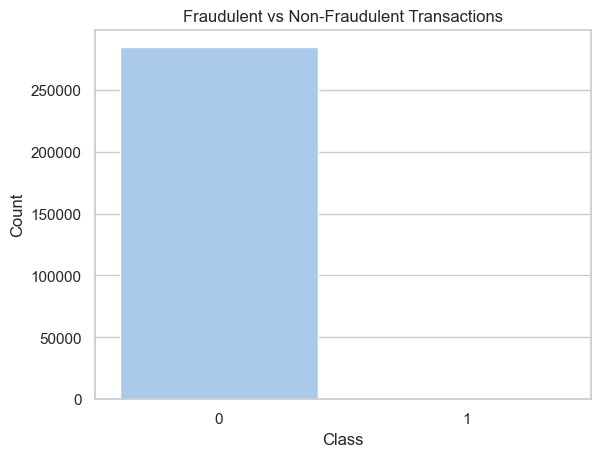

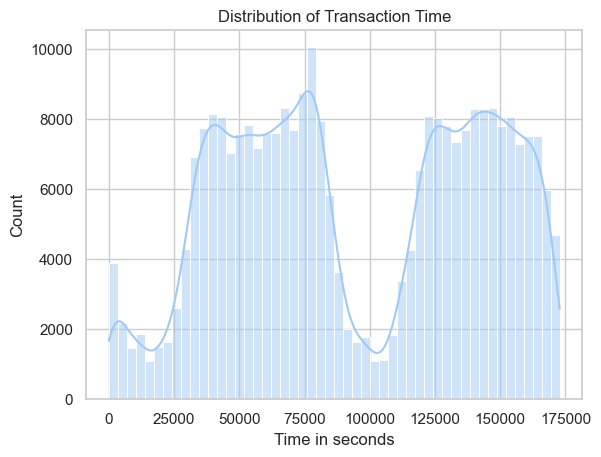

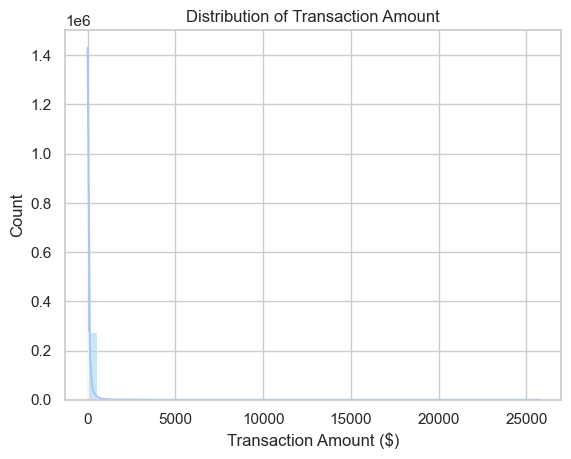

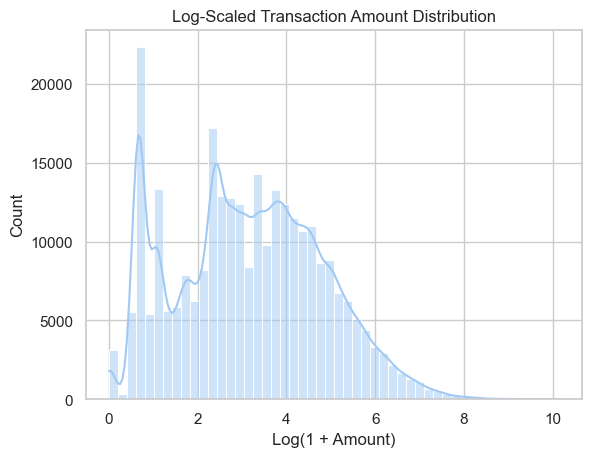

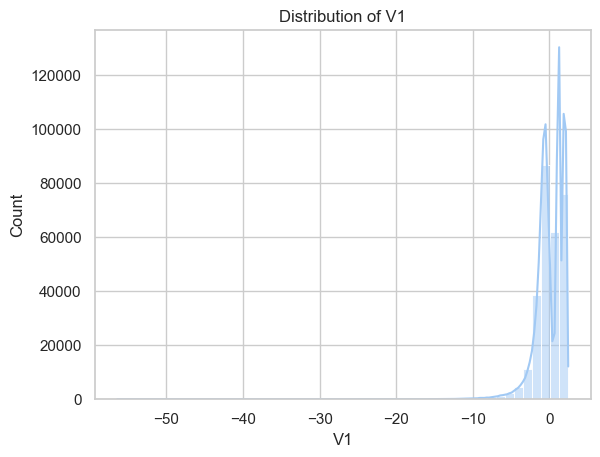

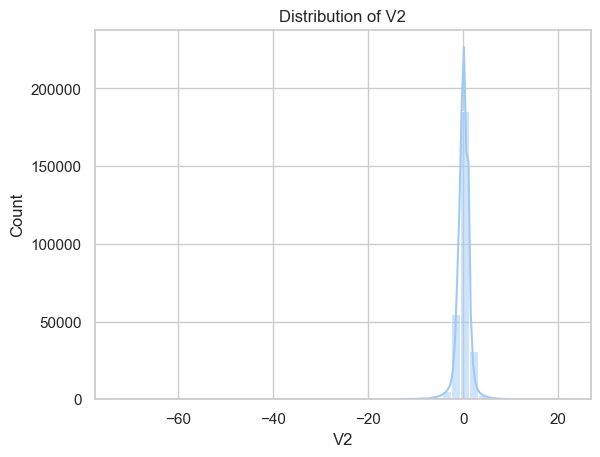

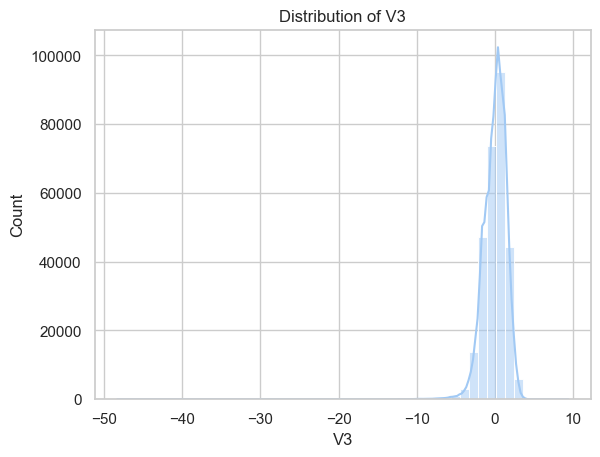

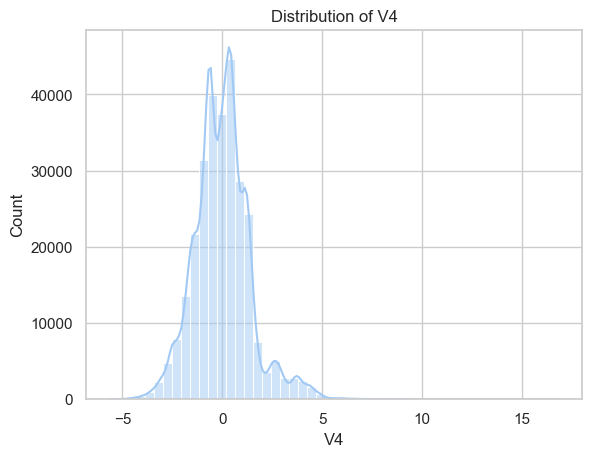

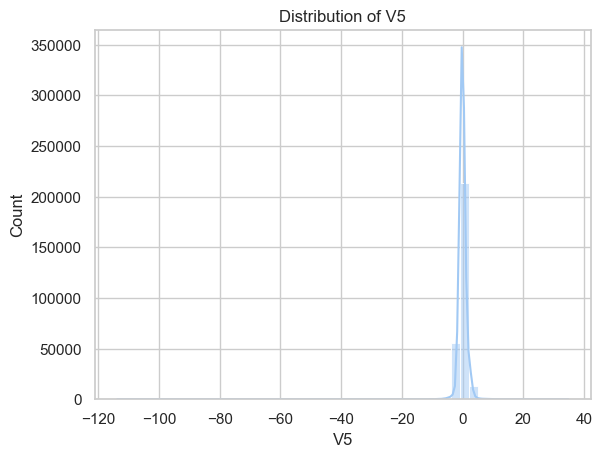

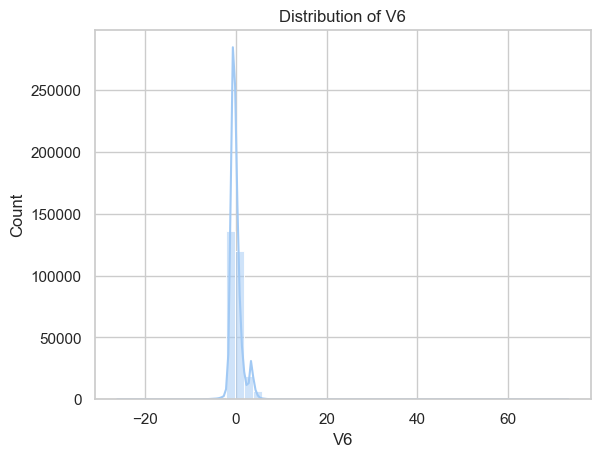

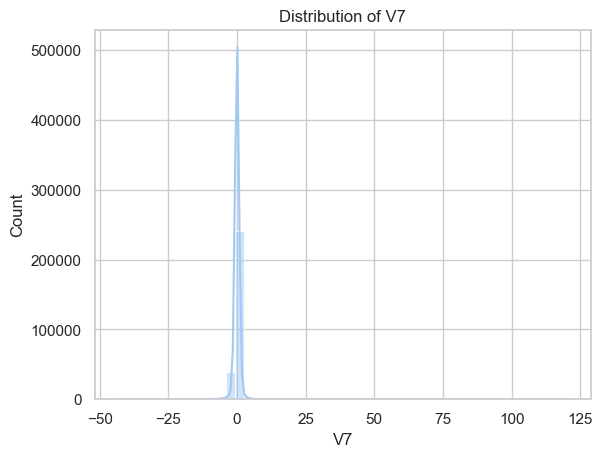

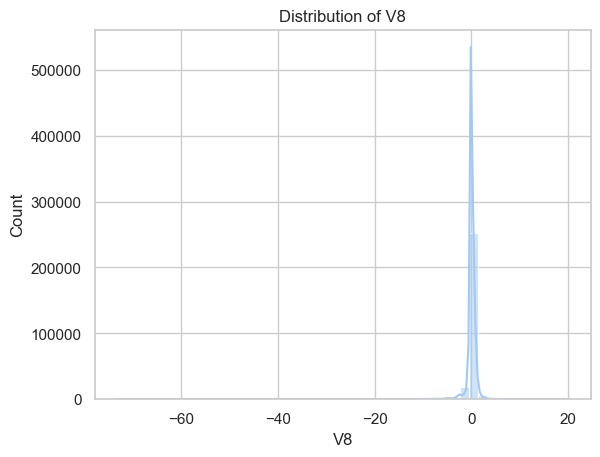

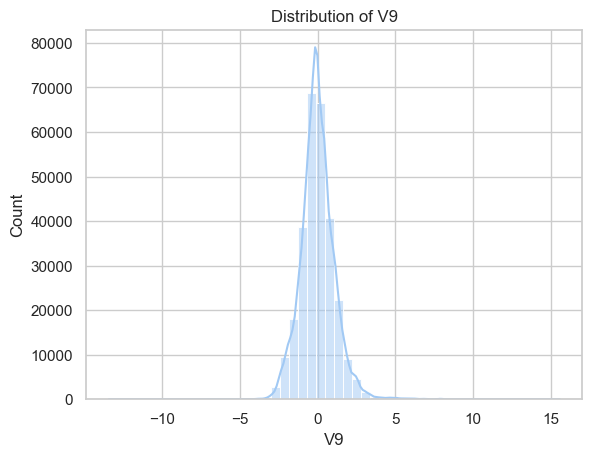

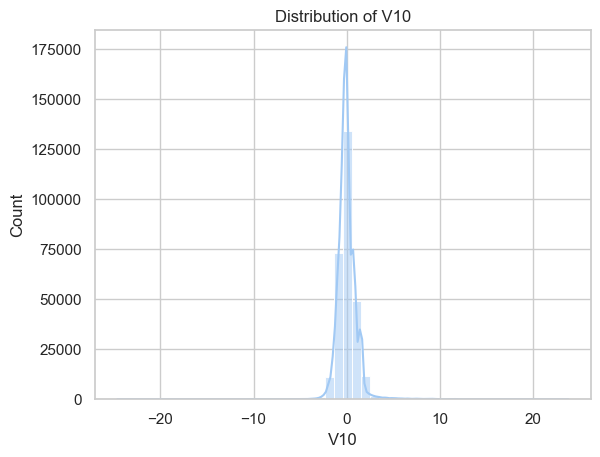

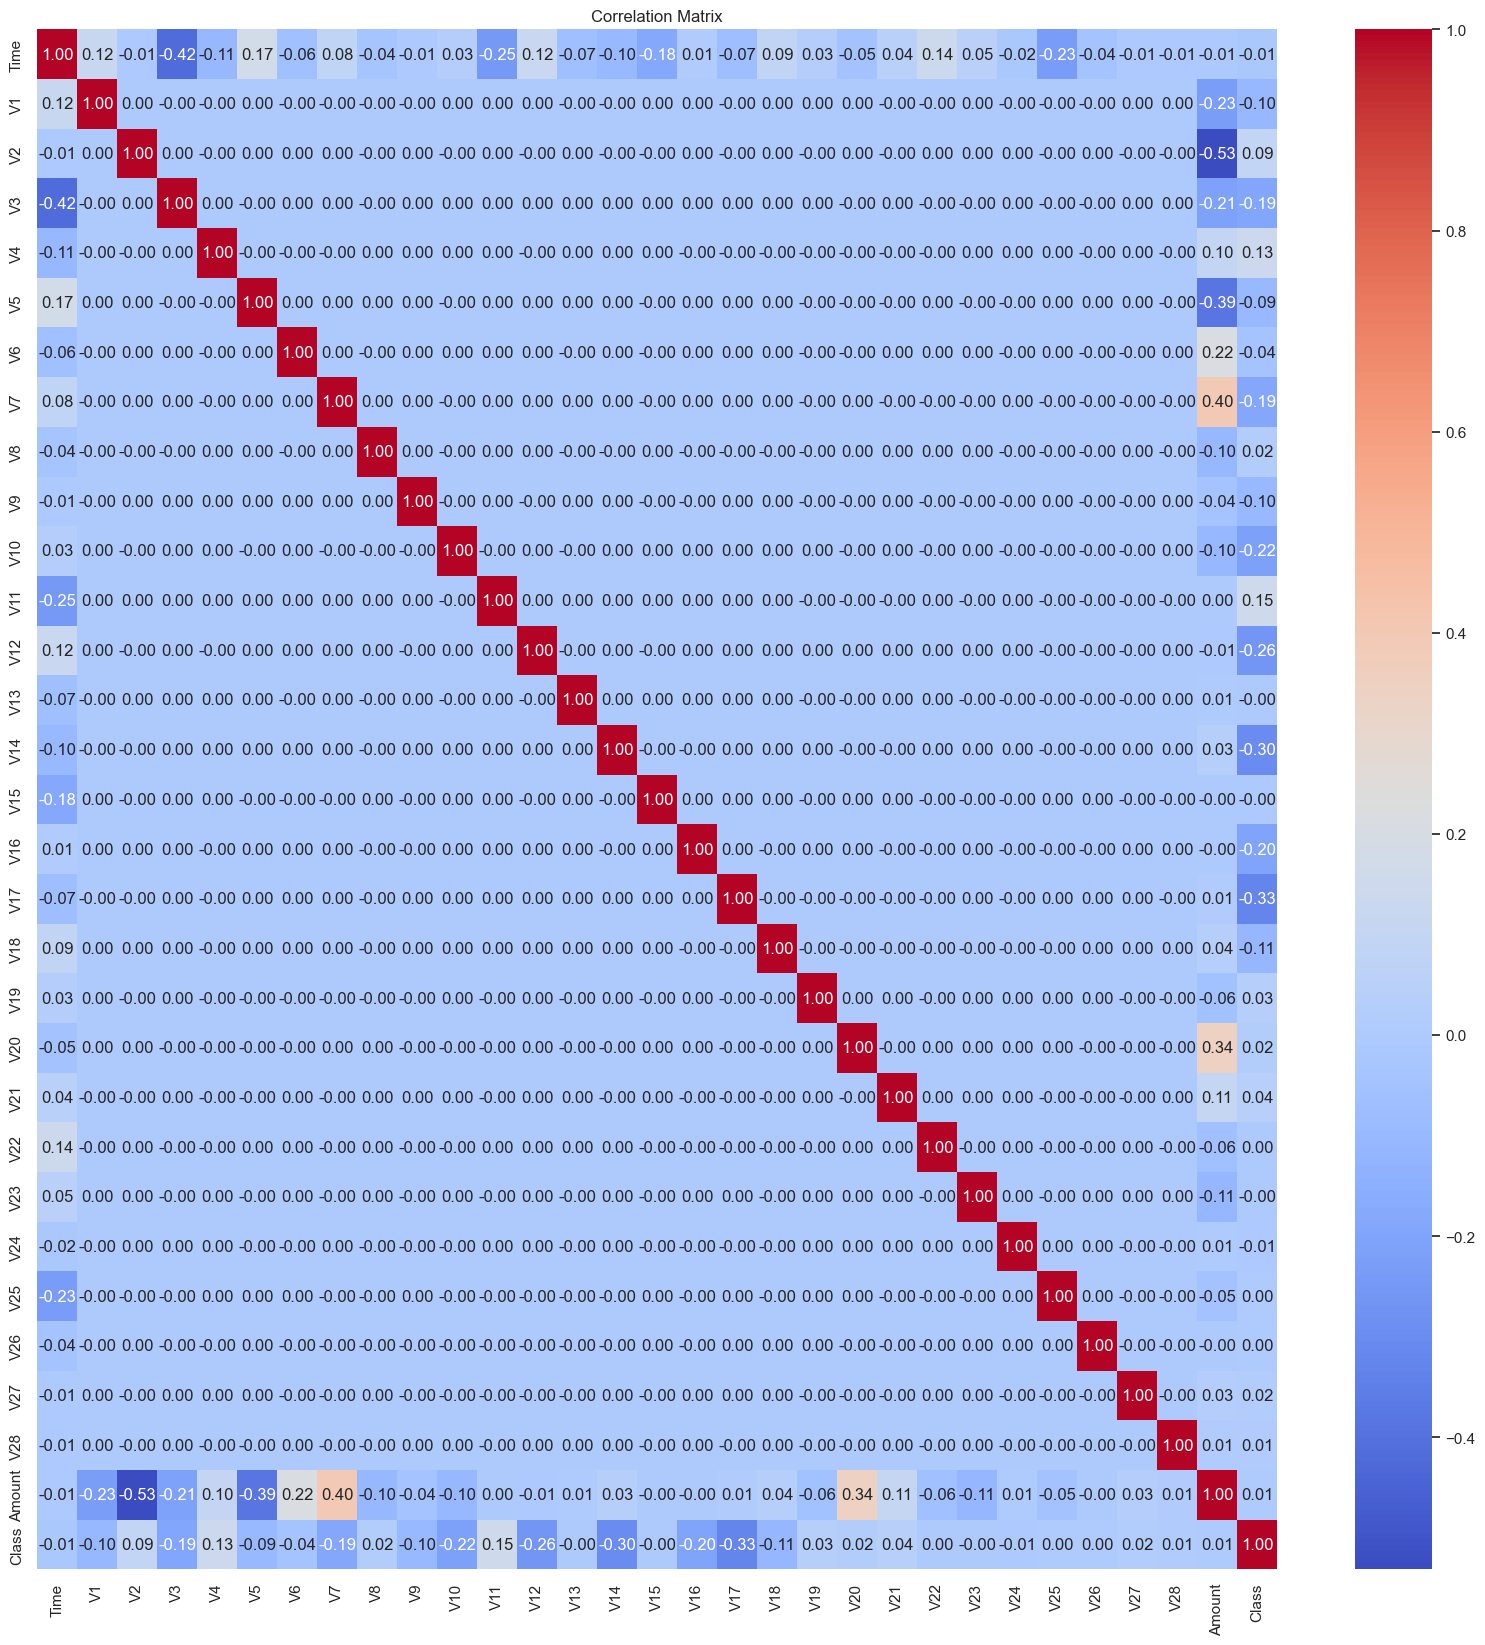

In [21]:
#Visualize class imbalance of transaction in a graph. 0 (non-fraud) 1 (fraud)
sns.countplot(x='Class', data=df)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#Plots when transactions occur to detect pattern
sns.histplot(df['Time'], kde=True, bins=50)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time in seconds')
plt.ylabel('Count')
plt.show()

#Displays the distribution of transaction amount to understand value ranges and outliers.
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Count')
plt.show()

#Shows the Log-scaled distribution of amount to reduce skew and highlight patterns in both small and large amounts.
sns.histplot(np.log1p(df['Amount']), kde=True, bins=50)
plt.title('Log-Scaled Transaction Amount Distribution')
plt.xlabel('Log(1 + Amount)')
plt.ylabel('Count')
plt.show()


#Plots the distribution for all the features
df_temp = df.drop(columns=['Time','Amount','Class'])
for col in df_temp.columns[:10]:
    sns.histplot(df_temp[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#Displays the correlation matrix between each PCA
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()